In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


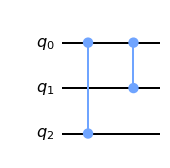

In [2]:
backend=Aer.get_backend('statevector_simulator')
oracle = QuantumCircuit(3,name='oracle')

oracle.cz(2,0)
oracle.cz(1,0)

oracle.draw()

In [3]:
grover=QuantumCircuit(3,3) #Creamos un circuito de 2 qubits
grover.h(range(3)) #INICIALIZACIÓN DE ESTADOS: Puertas hadamard en los dos qubits

job = execute(grover,backend) #Ejecutamos el circuito y guardamos el resultado de la ejecución
result= job.result()
sv = result.get_statevector() #Obtenemos el vector de estados
np.around(sv,2) #Redondeamos

array([0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j, 0.35+0.j,
       0.35+0.j, 0.35+0.j])

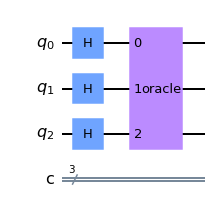

In [4]:
oracle = QuantumCircuit(3,name='oracle')

oracle.cz(2,0) #Puerta Controlled-Z con control en el tercer qubit y objetivo en el primero
oracle.cz(1,0) #Puerta Controlled-Z con control en el segundo qubit y objetivo en el primero
grover.append(oracle,range(3))

grover.draw()

In [5]:
job = execute(grover,backend)
result= job.result()
sv = result.get_statevector()
np.around(sv,2)

array([ 0.35+0.j,  0.35+0.j,  0.35+0.j, -0.35+0.j,  0.35+0.j, -0.35+0.j,
        0.35+0.j,  0.35-0.j])

OPERADOR DE GROVER SEGÚN NIELSENG & CHUANG

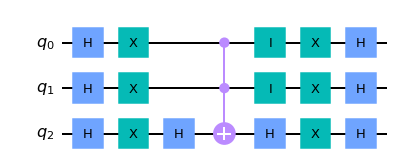

In [6]:
diffusion=QuantumCircuit(3,name='diffusion')
diffusion.h(range(3))    #Puertas hadamard en los dos qubits (desde el qubit 0 hasta el 2)
diffusion.x(range(3))    #Puertas X en los dos qubits (desde el qubit 0 hasta el 2)
diffusion.h(2)           #Puerta hadamard en el qubit 2
diffusion.mct([0,1],2,0) #Puerta CNOT con control en los qubits 0 y 1 y objetivo en el qubit 2
diffusion.i([0,1])       #Puerta identidad simplemente para mostrar las siguientes puertas
                         #X y hadamard a la misma altura
diffusion.h(2)
diffusion.x(range(3))
diffusion.h(range(3))
diffusion.draw()         #Dibujamos el circuito

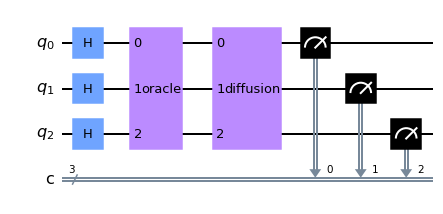

In [7]:
grover.append(diffusion,range(3))
grover.measure(range(3),range(3))
grover.draw()

In [8]:
job = execute(grover,backend,shots=1000)#Ejecutamos el algoritmo 1000 veces
result = job.result()
sv = result.get_statevector() #Obtenemos el vector de estados
np.around(sv,2)

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.-0.j, -0.+0.j,
        0.+0.j])

In [9]:
counts=result.get_counts()
counts

{'101': 503, '011': 497}